# **

# **About Dataset**

Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to WebMD, "about 5 million Americans need a blood transfusion every year".

This dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. I want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

The data is structured according to RFMTC marketing model (a variation of RFM). Let's get started exploring the data.

# **Loading the blood donations data**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [21]:
df = pd.read_csv("transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [22]:
df.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [23]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [24]:
for i in df.columns:
    print(cl(i,attrs=['bold'],color='blue'))

Recency (months)
Frequency (times)
Monetary (c.c. blood)
Time (months)
whether he/she donated blood in March 2007


# **Inspecting the Dataframe Columns**

Let's briefly discuss the RFM model. 

   RFM stands for Recency, Frequency and Monetary Value.

it is commonly used in marketing for identifying the best customers. In this case, the customers are the blood donors.

RFMTC is a variation of the RFM model. 

Below is a description of what each column means in our dataset:

* Recency (R) - months since the last donation
* Frequency (F) - total number of donation
* Monetary (M) - total blood donated in c.c.
* Time (T) - months since the first donation
* a binary variable representing whether he/she donated blood in March 2007 : 1 stands for donating blood & 0 stands for not donating blood

It looks like every column in the DataFrame is numeric, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.


In [25]:
df.info()  # summary of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


# **Renaming the Target Column**

Our aim is to predict the value in **whether he/she donated blood in March 2007** column. Let's rename this it to **target** so that it's more convenient to work with.


In [26]:
df.rename(columns={'whether he/she donated blood in March 2007':'target'},inplace=True)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# **Checking target incidence**

We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:

    0 - the donor will not give blood
    1 - the donor will give blood

Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? 
<br>
Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.

In [27]:
print(cl("Target Incidence",attrs=['bold'],color='blue'))
print(cl(df['target'].value_counts(normalize=True),attrs=[],color='cyan'))

Target Incidence
target
0    0.762032
1    0.237968
Name: proportion, dtype: float64


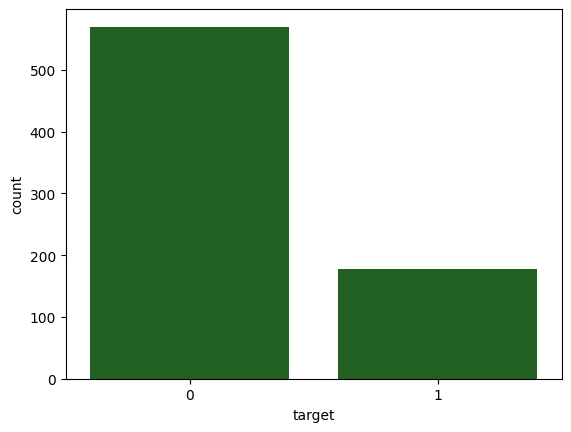

In [28]:
sns.countplot(x='target',data=df,color='green',saturation=0.5)
plt.show()

# **Splitting dataset into train and test datasets**

We'll now use train_test_split() method to split transfusion DataFrame.

It's clear from the Target incidence that **0's** appear **76%** of the time. 


We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the train_test_split() method from the scikit learn library - all we need to do is specify the stratify parameter. 

In our case, we'll stratify on the target column.

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split the df DataFrame into x_train, x_test, y_train and y_test datasets,
# stratifying on the `target` column
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42,stratify=df.target)

x_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
325,14,2,500,16
440,16,3,750,46
294,11,5,1250,35
4,1,24,6000,77
593,9,11,2750,49


# **Creating a Naive Bayes Model**

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1])

In [32]:
ATTRS = ['bold']
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Confusion Matrix :", attrs=ATTRS, color='green'))
print(cl(confusion_matrix(y_test, y_pred), attrs=ATTRS, color='cyan'))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Classification Report :",attrs=ATTRS, color='green'))
print(cl(classification_report(y_test, y_pred),attrs=ATTRS, color='cyan'))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))
print(cl("Accuracy Score Percentage :",attrs=ATTRS, color='green'))
print(cl(float("{:.2f}".format(accuracy_score(y_pred,y_test)*100)),attrs=ATTRS,color='cyan'))
print(cl("-----------------------------------------", attrs=ATTRS, color='red'))

-----------------------------------------
Confusion Matrix :
[[131  40]
 [ 21  33]]
-----------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       171
           1       0.45      0.61      0.52        54

    accuracy                           0.73       225
   macro avg       0.66      0.69      0.67       225
weighted avg       0.76      0.73      0.74       225

-----------------------------------------
Accuracy Score Percentage :
72.89
-----------------------------------------


# **Conclusion**

The demand for blood fluctuates throughout the year. As one prominent example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.

In this notebook, we explored the data using a Naive Bayes model and we got an accuracy score as 72.89%.